## Import Libraries📕

In [8]:
#libraries and tool importation
import numpy as np # linear algebra
import matplotlib.pylab as plt
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns

import pandas as pd # data processing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM, Bidirectional
from tensorflow.keras.layers import Dropout
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from keras.layers import BatchNormalization, Dropout
from keras.layers import Dense, Activation
from tensorflow import keras

from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC

plt.rcParams["figure.figsize"] = (16,10) #Make the plots bigger by default
plt.rcParams["lines.linewidth"] = 2 #Setting the default line width
plt.style.use("ggplot")

## Install and Download Datasets📈

In [9]:
# install and Download Dataset (0)
!pip install --upgrade --no-cache-dir gdown
!gdown 1Ov_Qt87feNW9G9NkSHkIApXCemhOil6K
# install and Download Dataset (1)
!pip install --upgrade --no-cache-dir gdown
!gdown 1W4iNWqlZoLFGFPCrAba_jJQtZIwieqjf
# install and Download Dataset (2)
!pip install --upgrade --no-cache-dir gdown
!gdown 1VPWoQVzoqSk-5FJ9L-DESXLSirFwYIkj
# install and Download Dataset (3)
!pip install --upgrade --no-cache-dir gdown
!gdown 1rnewNPGctSsSqElVWoGkdWmO6O3Ze_nf

Downloading...
From: https://drive.google.com/uc?id=1Ov_Qt87feNW9G9NkSHkIApXCemhOil6K
To: /content/0.csv
100% 927k/927k [00:00<00:00, 130MB/s]
Downloading...
From: https://drive.google.com/uc?id=1W4iNWqlZoLFGFPCrAba_jJQtZIwieqjf
To: /content/1.csv
100% 893k/893k [00:00<00:00, 144MB/s]
Downloading...
From: https://drive.google.com/uc?id=1VPWoQVzoqSk-5FJ9L-DESXLSirFwYIkj
To: /content/2.csv
100% 927k/927k [00:00<00:00, 145MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rnewNPGctSsSqElVWoGkdWmO6O3Ze_nf
To: /content/3.csv
100% 905k/905k [00:00<00:00, 145MB/s]


## Load Dataset📥

In [10]:
#original emg data
df0_emg = pd.read_csv("/content/0.csv", header=None )
df1_emg = pd.read_csv("/content/1.csv", header=None )
df2_emg = pd.read_csv("/content/2.csv", header=None )
df3_emg = pd.read_csv("/content/3.csv", header=None )
df_emg = pd.concat([df0_emg,df1_emg,df2_emg,df3_emg], axis = 0) #concatenate the dataframe
df0_emg , df1_emg , df2_emg , df3_emg , df_emg

(        0    1    2    3     4     5      6     7     8    9   ...    55  \
 0     26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ... -28.0   
 1    -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ... -25.0   
 2    -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ... -83.0   
 3      2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ... -38.0   
 4      6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ...  38.0   
 ...    ...  ...  ...  ...   ...   ...    ...   ...   ...  ...  ...   ...   
 2905 -12.0  0.0  0.0 -7.0  -4.0  -3.0   -1.0  -5.0   4.0 -1.0  ...  12.0   
 2906  -9.0 -1.0 -2.0  1.0 -13.0 -14.0  -59.0  -4.0  -9.0  0.0  ...  20.0   
 2907   3.0 -2.0 -2.0  4.0  18.0  -5.0  -31.0   7.0  -3.0 -3.0  ...  34.0   
 2908  -2.0 -2.0 -2.0  1.0  -3.0 -17.0  -33.0 -13.0   3.0  2.0  ...  -4.0   
 2909   0.0 -2.0 -3.0 -2.0   2.0   5.0   18.0  -1.0  -5.0 -2.0  ...  -2.0   
 
         56   57   58    59    60    61     62    63  64  
 0     61.0  4.

##Display the combined dataset

In [11]:
df = df_emg
df.head() #print the first 5 rows of df

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,26.0,4.0,5.0,8.0,-1.0,-13.0,-109.0,-66.0,-9.0,2.0,...,-28.0,61.0,4.0,8.0,5.0,4.0,-7.0,-59.0,16.0,0
1,-47.0,-6.0,-5.0,-7.0,13.0,-1.0,35.0,-10.0,10.0,-4.0,...,-25.0,47.0,6.0,6.0,5.0,13.0,21.0,111.0,15.0,0
2,-19.0,-8.0,-8.0,-8.0,-21.0,-6.0,-79.0,12.0,0.0,5.0,...,-83.0,7.0,7.0,1.0,-8.0,7.0,21.0,114.0,48.0,0
3,2.0,3.0,0.0,2.0,0.0,22.0,106.0,-14.0,-16.0,-2.0,...,-38.0,-11.0,4.0,7.0,11.0,33.0,39.0,119.0,43.0,0
4,6.0,0.0,0.0,-2.0,-14.0,10.0,-51.0,5.0,7.0,0.0,...,38.0,-35.0,-8.0,2.0,6.0,-13.0,-24.0,-112.0,-69.0,0


In [12]:
df.isnull().sum()

# Remove rows with any null values
# df.dropna(inplace=True)

0     0
1     0
2     0
3     0
4     0
     ..
60    0
61    0
62    0
63    0
64    0
Length: 65, dtype: int64

In [13]:
df_emg.shape

(11678, 65)

In [14]:
# Create a 4x4 grid of subplots for various numerical variables
plt.figure(figsize=(120, 120))

plt.subplot(16,4,1)
sns.distplot(df[0], color="red").set_title('s1_1')

plt.subplot(16,4,2)
sns.distplot(df[1], color="green").set_title('s1_2')

plt.subplot(16,4,3)
sns.distplot(df[2], color="black").set_title('s1_3')

plt.subplot(16,4,4)
sns.distplot(df[3], color="blue").set_title('s1_4')

plt.subplot(16,4,5)
sns.distplot(df[4], color="red").set_title('s1_5')

plt.subplot(16,4,6)
sns.distplot(df[5], color="green").set_title('s1_6')

plt.subplot(16,4,7)
sns.distplot(df[6], color="black").set_title('s1_7')

plt.subplot(16,4,8)
sns.distplot(df[7], color="blue").set_title('s1_8')

plt.subplot(16,4,9)
sns.distplot(df[8], color="red").set_title('s2_1')

plt.subplot(16,4,10)
sns.distplot(df[9], color="green").set_title('s2_2')

plt.subplot(16,4,11)
sns.distplot(df[10], color="black").set_title('s2_3')

plt.subplot(16,4,12)
sns.distplot(df[11], color="blue").set_title('s2_4')

plt.subplot(16,4,13)
sns.distplot(df[12], color="red").set_title('s2_5')

plt.subplot(16,4,14)
sns.distplot(df[13], color="green").set_title('s2_6')

plt.subplot(16,4,15)
sns.distplot(df[14], color="black").set_title('s2_7')

plt.subplot(16,4,16)
sns.distplot(df[15], color="blue").set_title('s2_8')

plt.subplot(16,4,17)
sns.distplot(df[16], color="red").set_title('s3_1')

plt.subplot(16,4,18)
sns.distplot(df[17], color="green").set_title('s3_2')

plt.subplot(16,4,19)
sns.distplot(df[18], color="black").set_title('s3_3')

plt.subplot(16,4,20)
sns.distplot(df[19], color="blue").set_title('s3_4')

plt.subplot(16,4,21)
sns.distplot(df[20], color="red").set_title('s3_5')

plt.subplot(16,4,22)
sns.distplot(df[21], color="green").set_title('s3_6')

plt.subplot(16,4,23)
sns.distplot(df[22], color="black").set_title('s3_7')

plt.subplot(16,4,24)
sns.distplot(df[23], color="blue").set_title('s3_8')

plt.subplot(16,4,25)
sns.distplot(df[24], color="red").set_title('s4_1')

plt.subplot(16,4,26)
sns.distplot(df[25], color="green").set_title('s4_2')

plt.subplot(16,4,27)
sns.distplot(df[26], color="black").set_title('s4_3')

plt.subplot(16,4,28)
sns.distplot(df[27], color="blue").set_title('s4_4')

plt.subplot(16,4,29)
sns.distplot(df[28], color="red").set_title('s4_5')

plt.subplot(16,4,30)
sns.distplot(df[29], color="green").set_title('s4_6')

plt.subplot(16,4,31)
sns.distplot(df[30], color="black").set_title('s4_7')

plt.subplot(16,4,32)
sns.distplot(df[31], color="blue").set_title('s4_8')

plt.subplot(16,4,33)
sns.distplot(df[32], color="red").set_title('s5_1')

plt.subplot(16,4,34)
sns.distplot(df[33], color="green").set_title('s5_2')

plt.subplot(16,4,35)
sns.distplot(df[34], color="black").set_title('s5_3')

plt.subplot(16,4,36)
sns.distplot(df[35], color="blue").set_title('s5_4')

plt.subplot(16,4,37)
sns.distplot(df[36], color="red").set_title('s5_5')

plt.subplot(16,4,38)
sns.distplot(df[37], color="green").set_title('s5_6')

plt.subplot(16,4,39)
sns.distplot(df[38], color="black").set_title('s5_7')

plt.subplot(16,4,40)
sns.distplot(df[39], color="blue").set_title('s5_8')

plt.subplot(16,4,41)
sns.distplot(df[40], color="red").set_title('s6_1')

plt.subplot(16,4,42)
sns.distplot(df[41], color="green").set_title('s6_2')

plt.subplot(16,4,43)
sns.distplot(df[42], color="black").set_title('s6_3')

plt.subplot(16,4,44)
sns.distplot(df[43], color="blue").set_title('s6_4')

plt.subplot(16,4,45)
sns.distplot(df[44], color="red").set_title('s6_5')

plt.subplot(16,4,46)
sns.distplot(df[45], color="green").set_title('s6_6')

plt.subplot(16,4,47)
sns.distplot(df[46], color="black").set_title('s6_7')

plt.subplot(16,4,48)
sns.distplot(df[47], color="blue").set_title('s6_8')

plt.subplot(16,4,49)
sns.distplot(df[48], color="red").set_title('s7_1')

plt.subplot(16,4,50)
sns.distplot(df[49], color="green").set_title('s7_2')

plt.subplot(16,4,51)
sns.distplot(df[50], color="black").set_title('s7_3')

plt.subplot(16,4,52)
sns.distplot(df[51], color="blue").set_title('s7_4')

plt.subplot(16,4,53)
sns.distplot(df[52], color="red").set_title('s7_5')

plt.subplot(16,4,54)
sns.distplot(df[53], color="green").set_title('s7_6')

plt.subplot(16,4,55)
sns.distplot(df[54], color="black").set_title('s7_7')

plt.subplot(16,4,56)
sns.distplot(df[55], color="blue").set_title('s7_8')

plt.subplot(16,4,57)
sns.distplot(df[56], color="red").set_title('s8_1')

plt.subplot(16,4,58)
sns.distplot(df[57], color="green").set_title('s8_2')

plt.subplot(16,4,59)
sns.distplot(df[58], color="black").set_title('s8_3')

plt.subplot(16,4,60)
sns.distplot(df[59], color="blue").set_title('s8_4')

plt.subplot(16,4,61)
sns.distplot(df[60], color="red").set_title('s8_5')

plt.subplot(16,4,62)
sns.distplot(df[61], color="green").set_title('s8_6')

plt.subplot(16,4,63)
sns.distplot(df[62], color="black").set_title('s8_7')

plt.subplot(16,4,64)
sns.distplot(df[63], color="blue").set_title('s8_8')


Output hidden; open in https://colab.research.google.com to view.

## Preparation of emg-4 data

## Split the labels (y) from the emg data (x)

In [15]:
X = df.loc[:,0:63]
y = df[64]
X , y

(        0    1    2    3     4     5      6     7     8    9   ...     54  \
 0     26.0  4.0  5.0  8.0  -1.0 -13.0 -109.0 -66.0  -9.0  2.0  ...   21.0   
 1    -47.0 -6.0 -5.0 -7.0  13.0  -1.0   35.0 -10.0  10.0 -4.0  ... -105.0   
 2    -19.0 -8.0 -8.0 -8.0 -21.0  -6.0  -79.0  12.0   0.0  5.0  ... -128.0   
 3      2.0  3.0  0.0  2.0   0.0  22.0  106.0 -14.0 -16.0 -2.0  ...  -54.0   
 4      6.0  0.0  0.0 -2.0 -14.0  10.0  -51.0   5.0   7.0  0.0  ...   60.0   
 ...    ...  ...  ...  ...   ...   ...    ...   ...   ...  ...  ...    ...   
 2917  -3.0 -1.0 -1.0 -1.0 -28.0  20.0    5.0   0.0  -5.0  0.0  ...   -3.0   
 2918 -13.0 -5.0 -4.0 -3.0  -4.0 -24.0  -10.0  -8.0  20.0  9.0  ...    5.0   
 2919  -1.0 -3.0 -1.0  1.0  30.0  38.0   -1.0  36.0 -10.0  1.0  ...   12.0   
 2920   1.0  4.0  4.0  5.0   9.0 -10.0    4.0   1.0  -2.0 -1.0  ...   -2.0   
 2921  -2.0  4.0  2.0 -4.0  12.0   3.0   -2.0   9.0  -8.0 -2.0  ...  -10.0   
 
         55    56   57   58    59    60    61     62    63  
 

In [16]:
# Count the number of samples in each class
unique, counts = np.unique(y, return_counts=True)
print("Class counts before balancing:", dict(zip(unique, counts)))

# Use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X, y)

# Count the number of samples in each class after balancing
unique_resampled, counts_resampled = np.unique(y_resampled, return_counts=True)
print("Class counts after balancing:", dict(zip(unique_resampled, counts_resampled)))
print('\n')
print("New balanced dataset shape:", X_resampled.shape, y_resampled.shape)

Class counts before balancing: {0: 2910, 1: 2903, 2: 2943, 3: 2922}
Class counts after balancing: {0: 2903, 1: 2903, 2: 2903, 3: 2903}


New balanced dataset shape: (11612, 64) (11612,)


In [17]:
X = X_resampled
y = y_resampled
print(X.shape, y.shape)

(11612, 64) (11612,)


## find the unique elements of y array🎯

In [18]:
y.unique()

array([0, 1, 2, 3])

## conversion to NumPy arrays

In [19]:
X = np.array(X)
y = np.array(y)
X , y

(array([[-25.,   6.,  -5., ...,  44., 127.,   4.],
        [ 62.,  -2., -16., ..., -16.,  42.,   5.],
        [-32.,  -9.,   3., ...,   2., -43., -20.],
        ...,
        [  6.,   5.,   2., ..., -17.,  -9.,  -2.],
        [ -3.,  -3.,   0., ...,  12.,   5.,   1.],
        [  5.,   7.,   7., ..., -30.,  -9.,  -6.]]),
 array([0, 0, 0, ..., 3, 3, 3]))

##subdivision in training and test set📊

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=83, stratify=y, shuffle=True)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((8709, 64), (2903, 64), (8709,), (2903,))

## StandardScaler🧮

In [21]:
X_train = X_train.reshape(X_train.shape[0]*X_train.shape[1], 1) #m x n matrix --> column vector
X_test = X_test.reshape(X_test.shape[0]*X_test.shape[1], 1)
#x.shape[0] = number of rows in x
#x.shape[1] = number of columns in x

sc = StandardScaler() #select the scaler
X_train = sc.fit_transform(X_train) #fit and transform x_train
X_test = sc.transform(X_test) #transform x_test
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((557376, 1), (185792, 1), (8709,), (2903,))

In [22]:
X_train = X_train.reshape((-1, 8, 8))
X_test = X_test.reshape((-1, 8, 8))

print("Training set size")
print(X_train.shape)
print("Test set size")
print(X_test.shape)

Training set size
(8709, 8, 8)
Test set size
(2903, 8, 8)


In [23]:
y_train_categorical = np.eye(np.max(y_train) + 1)[y_train] #4x4 identical matrix indexed by y_train
#np.eye(np.max(y) + 1) -> 4x4 Id matrix (max(y) = 3)
y_train_categorical

array([[0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [24]:
print("Train Data size X and y")
print(X_train.shape)
print(y_train_categorical.shape)

print("Test Data size X and y")
print(X_test.shape)
print(y_test.shape)

Train Data size X and y
(8709, 8, 8)
(8709, 4)
Test Data size X and y
(2903, 8, 8)
(2903,)


## Recurrent NN🧬

In [27]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 8)))
model.add(Dropout(0.2)) #dropout rate = 20%

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 64))
model.add(Dense(units = 128))

model.add(Dense(units = 4, activation="softmax")) #4 as the output classes
model.compile(optimizer = "adam" , loss = "categorical_crossentropy", metrics=["accuracy"]) #***

In [28]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 8, 50)             11800     
                                                                 
 dropout (Dropout)           (None, 8, 50)             0         
                                                                 
 lstm_1 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_1 (Dropout)         (None, 8, 50)             0         
                                                                 
 lstm_2 (LSTM)               (None, 8, 50)             20200     
                                                                 
 dropout_2 (Dropout)         (None, 8, 50)             0         
                                                                 
 lstm_3 (LSTM)               (None, 50)               

In [29]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

In [30]:
history=model.fit(X_train, y_train_categorical, epochs = 250, batch_size = 32, verbose=2 , callbacks=[callback],validation_split=0.2,)

Epoch 1/250
218/218 - 9s - loss: 0.8480 - accuracy: 0.5576 - val_loss: 0.4905 - val_accuracy: 0.7623 - 9s/epoch - 43ms/step
Epoch 2/250
218/218 - 3s - loss: 0.4043 - accuracy: 0.8450 - val_loss: 0.2544 - val_accuracy: 0.9053 - 3s/epoch - 13ms/step
Epoch 3/250
218/218 - 5s - loss: 0.2353 - accuracy: 0.9215 - val_loss: 0.1694 - val_accuracy: 0.9449 - 5s/epoch - 25ms/step
Epoch 4/250
218/218 - 3s - loss: 0.1822 - accuracy: 0.9429 - val_loss: 0.1277 - val_accuracy: 0.9535 - 3s/epoch - 12ms/step
Epoch 5/250
218/218 - 3s - loss: 0.1509 - accuracy: 0.9498 - val_loss: 0.1392 - val_accuracy: 0.9587 - 3s/epoch - 12ms/step
Epoch 6/250
218/218 - 3s - loss: 0.1305 - accuracy: 0.9554 - val_loss: 0.1436 - val_accuracy: 0.9587 - 3s/epoch - 12ms/step
Epoch 7/250
218/218 - 3s - loss: 0.1201 - accuracy: 0.9614 - val_loss: 0.1096 - val_accuracy: 0.9627 - 3s/epoch - 13ms/step
Epoch 8/250
218/218 - 3s - loss: 0.1093 - accuracy: 0.9641 - val_loss: 0.1371 - val_accuracy: 0.9569 - 3s/epoch - 12ms/step
Epoch 9/

## Accuracy📏

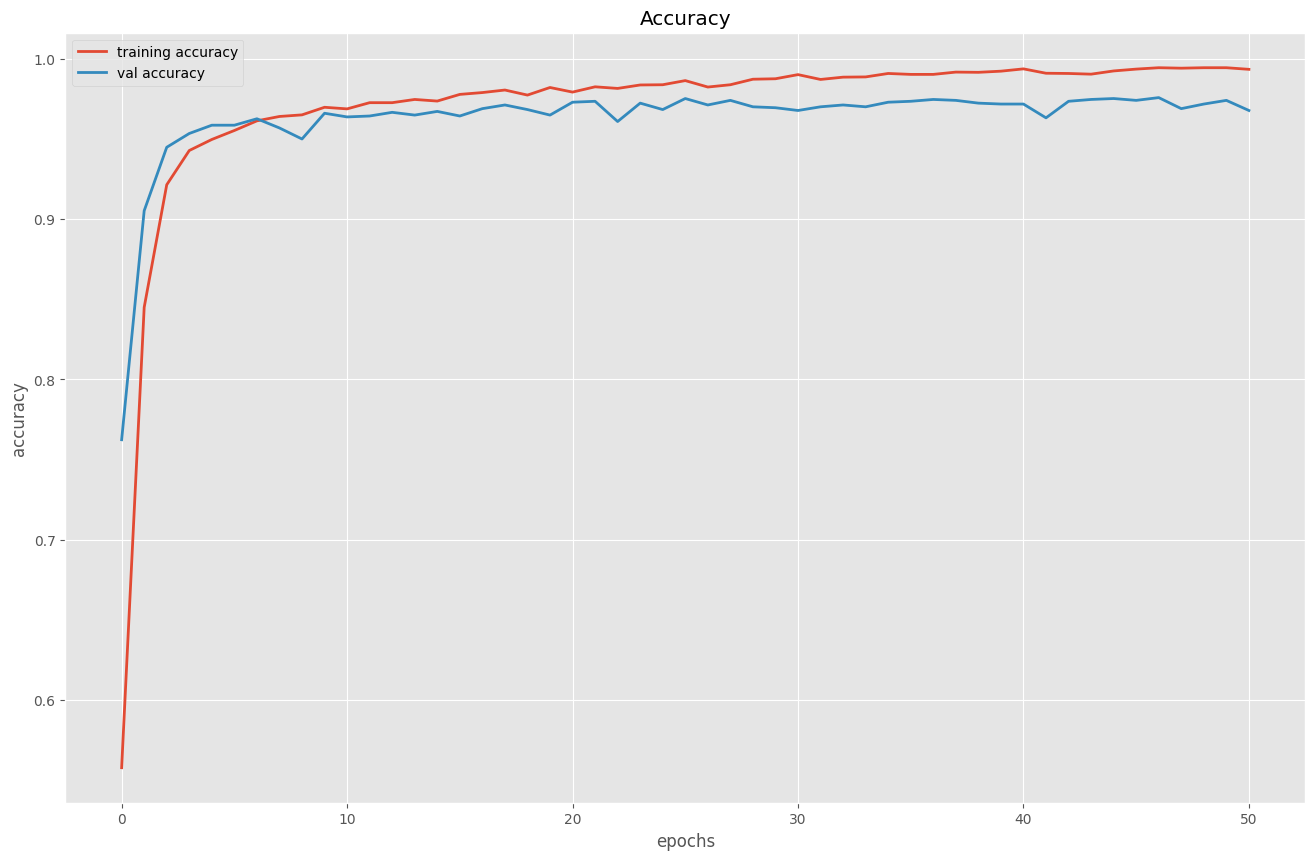

In [31]:
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

## Loss during training📉

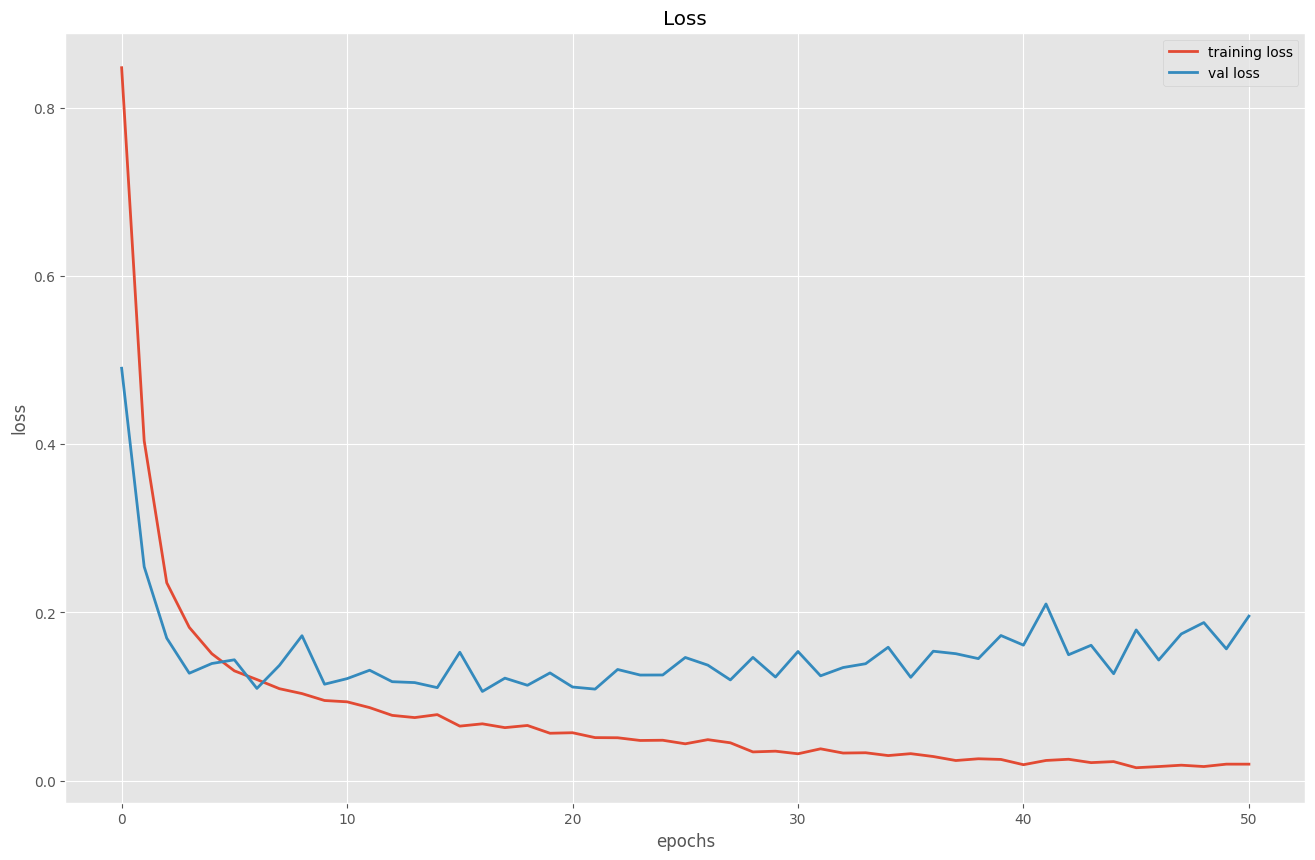

In [32]:
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

## RESULTS of NN📋

91/91 [==============================] - 1s 3ms/step


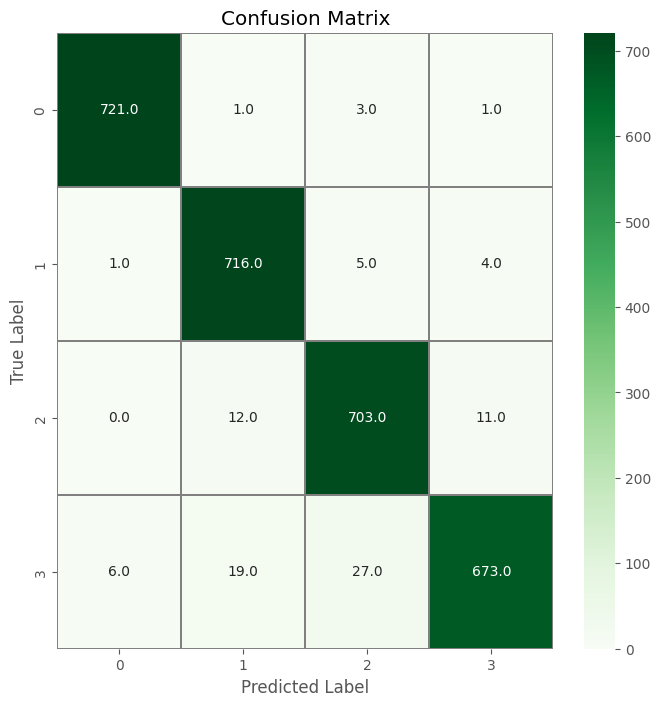

In [33]:
#calculate predictions
y_pred_categorical = model.predict(X_test)
#convert one hot vectors to prediction classes
y_pred = np.argmax(y_pred_categorical,axis = 1) #returns the index of the max element of each row of Y_pred
#-->returns values from 0 to 3
#confusion matrix
import seaborn as sns
confusion_mtx = confusion_matrix(y_test, y_pred)

#plot of the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [34]:
#print the classification report to evaluate the model
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       726
           1       0.96      0.99      0.97       726
           2       0.95      0.97      0.96       726
           3       0.98      0.93      0.95       725

    accuracy                           0.97      2903
   macro avg       0.97      0.97      0.97      2903
weighted avg       0.97      0.97      0.97      2903



## SVM Classifier🎨

In [35]:
X_train_svm = X_train
y_train_svm = y_train
X_test_svm = X_test
y_test_svm = y_test

print("Train Data size x and y")
print(X_train_svm.shape)
print(y_train_svm.shape)

print("Test Data size x and y")
print(X_test_svm.shape)
print(y_test_svm.shape)

Train Data size x and y
(8709, 8, 8)
(8709,)
Test Data size x and y
(2903, 8, 8)
(2903,)


##  Install tslearn, the package containing TimeSeriesSVC

In [36]:
!pip install tslearn --upgrade --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 3.3 MB/s eta 0:00:00


In [39]:
from tslearn.svm import TimeSeriesSVC

classifier = TimeSeriesSVC(kernel='linear',random_state = 93)
classifier.fit(X_train_svm,y_train_svm)
y_pred_svm_1 = classifier.predict(X_test_svm)

classifier = TimeSeriesSVC(kernel='rbf',random_state = 93)
classifier.fit(X_train_svm,y_train_svm)
y_pred_svm_2 = classifier.predict(X_test_svm)

classifier = TimeSeriesSVC(kernel='poly',random_state = 93)
classifier.fit(X_train_svm,y_train_svm)
y_pred_svm_3 = classifier.predict(X_test_svm)

classifier = TimeSeriesSVC(kernel='sigmoid',random_state = 93)
classifier.fit(X_train_svm,y_train_svm)
y_pred_svm_4 = classifier.predict(X_test_svm)

## RESULTS✅

In [40]:
from sklearn import metrics
#model accuracy
print("SVM classifier accuracy:",metrics.accuracy_score(y_test_svm, y_pred_svm_1))
print("SVM classifier accuracy:",metrics.accuracy_score(y_test_svm, y_pred_svm_2))
print("SVM classifier accuracy:",metrics.accuracy_score(y_test_svm, y_pred_svm_3))
print("SVM classifier accuracy:",metrics.accuracy_score(y_test_svm, y_pred_svm_4))

SVM classifier accuracy: 0.34516017912504304
SVM classifier accuracy: 0.2497416465725112
SVM classifier accuracy: 0.4984498794350672
SVM classifier accuracy: 0.15707888391319325


## confusion Matrix🎲

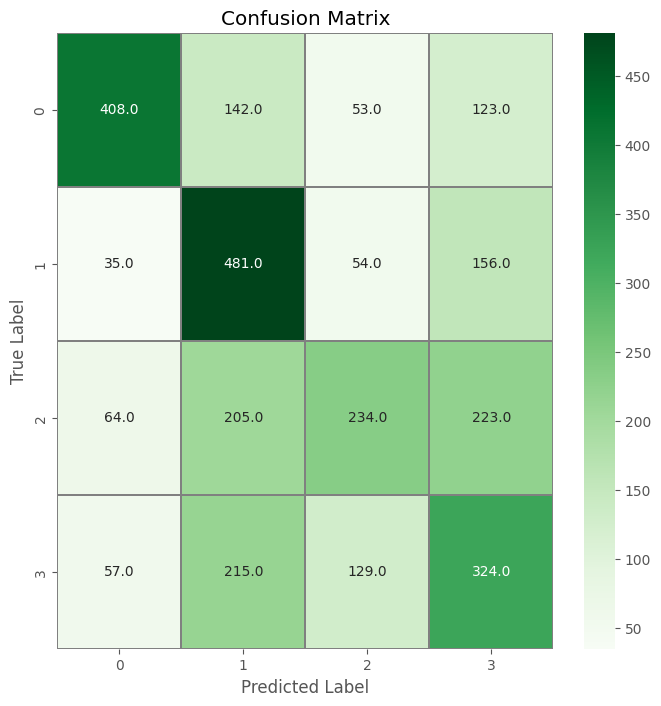

In [41]:
confusion_mtx = confusion_matrix(y_test_svm, y_pred_svm_3)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [42]:
print('Classification report - SVM')
print(classification_report(y_test_svm, y_pred_svm_3))

Classification report - SVM
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       726
           1       0.46      0.66      0.54       726
           2       0.50      0.32      0.39       726
           3       0.39      0.45      0.42       725

    accuracy                           0.50      2903
   macro avg       0.52      0.50      0.50      2903
weighted avg       0.52      0.50      0.50      2903



## Random Forest Classifier

In [43]:
#mean extraction - training set
X_train_rf = np.empty((0,8)) #empty array of 8 columns
for i in range(0,X_train.shape[0]): #x_train.shape[0]
    matrix_8x8 = X_train[i]
    ch_means = matrix_8x8.mean(0) #mean for each channel in 8 timesteps
    X_train_rf = np.vstack((X_train_rf,ch_means))
print('X_train_rf size:')
print(X_train_rf.shape)

#mean extraction - test set
X_test_rf = np.empty((0,8)) #empty array of 8 columns
for i in range(0,X_test.shape[0]):
    matrix_8x8 = X_test[i]
    ch_means = matrix_8x8.mean(0) #mean for each channel in 8 timesteps
    X_test_rf = np.vstack((X_test_rf,ch_means))
print('X_test_rf size:')
print(X_test_rf.shape)

X_train_rf size:
(8709, 8)
X_test_rf size:
(2903, 8)


In [44]:
y_train_rf = y_train
y_test_rf = y_test

print('y_train_rf size:')
print(y_train_rf.shape)
print('y_test_rf size:')
print(y_test_rf.shape)

y_train_rf size:
(8709,)
y_test_rf size:
(2903,)


## Classifier and Prediction

In [96]:
#import the classifier
from sklearn.ensemble import RandomForestClassifier

#fit of the classifier to the training data
rf_model = RandomForestClassifier(n_estimators=100,random_state=93)
rf_model.fit(X_train_rf, y_train_rf)

#predictions
y_pred_rf = rf_model.predict(X_test_rf)

## RESULTS of Random Forest💾

In [97]:
# Model Accuracy
print("RandomForestClassifier accuracy:",metrics.accuracy_score(y_test_rf, y_pred_rf))

RandomForestClassifier accuracy: 0.6930761281433


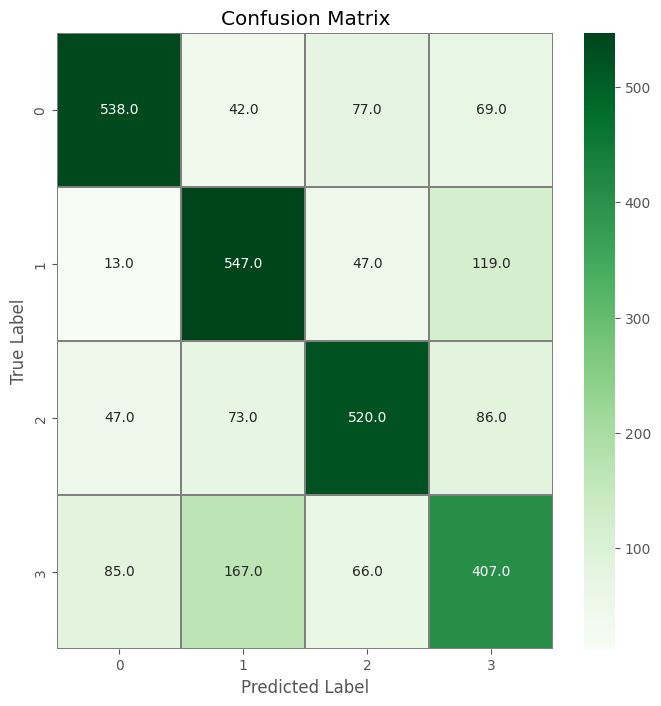

In [98]:
#confusion matrix
confusion_mtx = confusion_matrix(y_test_rf, y_pred_rf)
#plot
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Accuracy

In [99]:
print('Classification report - Random Forest')
print(classification_report(y_test_rf, y_pred_rf))

Classification report - Random Forest
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       726
           1       0.66      0.75      0.70       726
           2       0.73      0.72      0.72       726
           3       0.60      0.56      0.58       725

    accuracy                           0.69      2903
   macro avg       0.69      0.69      0.69      2903
weighted avg       0.69      0.69      0.69      2903



## SVC Classifier🧩

## Reshaping Data

In [100]:
import numpy as np

X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, f1_score
model = SVC(kernel = 'rbf',decision_function_shape='ovo')
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       726
           1       0.80      0.97      0.88       726
           2       0.89      0.75      0.81       726
           3       0.81      0.79      0.80       725

    accuracy                           0.87      2903
   macro avg       0.87      0.87      0.86      2903
weighted avg       0.87      0.87      0.86      2903



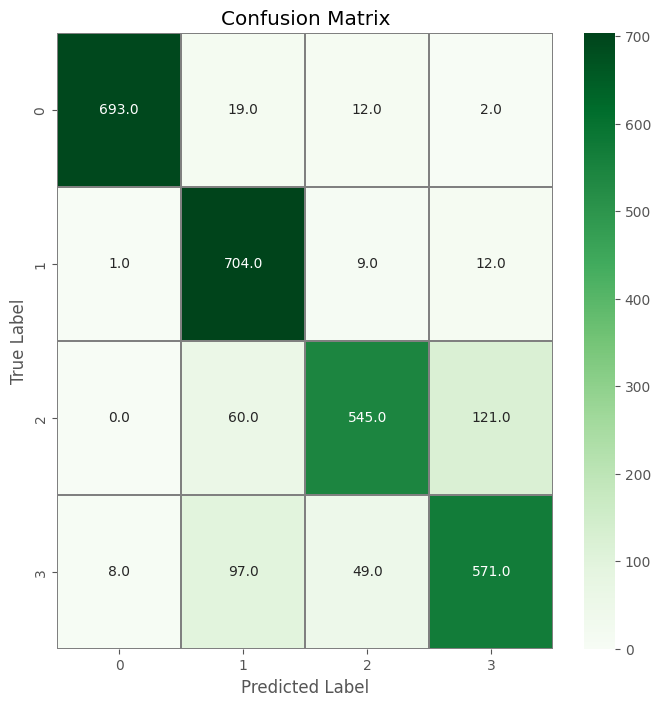

In [114]:
#confusion matrix
confusion_mtx = confusion_matrix(y_test, predictions)
#plot
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## Comparison of classification methods🎰

In [115]:
print('Classification report - Recurrent NN')
print(classification_report(y_test, y_pred))
print('--------------------------------------------------------')
print('Classification report - SVM')
print(classification_report(y_test_svm, y_pred_svm_3))
print('--------------------------------------------------------')
print('Classification report - Random Forest')
print(classification_report(y_test_rf, y_pred_rf))
print('--------------------------------------------------------')
print('Classification report - SVC')
print(classification_report(y_test, predictions))

Classification report - Recurrent NN
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       726
           1       0.96      0.99      0.97       726
           2       0.95      0.97      0.96       726
           3       0.98      0.93      0.95       725

    accuracy                           0.97      2903
   macro avg       0.97      0.97      0.97      2903
weighted avg       0.97      0.97      0.97      2903

--------------------------------------------------------
Classification report - SVM
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       726
           1       0.46      0.66      0.54       726
           2       0.50      0.32      0.39       726
           3       0.39      0.45      0.42       725

    accuracy                           0.50      2903
   macro avg       0.52      0.50      0.50      2903
weighted avg       0.52      0.50      0.50      2903

--------

## MLP🌡

In [179]:
model = MLPClassifier(hidden_layer_sizes=(80,), activation='relu', solver='adam',
                      alpha=0.1,max_iter=100, shuffle=True, random_state=93)

In [180]:
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.9486737857388908

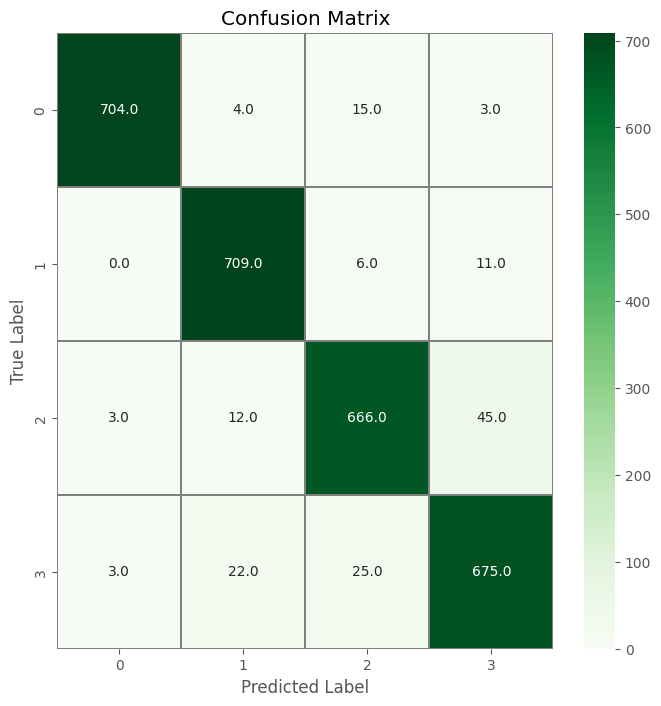

In [181]:
predictions = model.predict(X_test)
#confusion matrix
confusion_mtx = confusion_matrix(y_test, predictions)
#plot
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [182]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       726
           1       0.95      0.98      0.96       726
           2       0.94      0.92      0.93       726
           3       0.92      0.93      0.93       725

    accuracy                           0.95      2903
   macro avg       0.95      0.95      0.95      2903
weighted avg       0.95      0.95      0.95      2903



## **🔸 Decision Tree (sklearn)**

In [229]:
from sklearn.datasets import load_iris
from sklearn import tree

## Classification📚

In [278]:
clf = tree.DecisionTreeClassifier(max_depth=18, random_state=42, ccp_alpha=0.001)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=18, random_state=42)

[Text(0.38541861024867896, 0.96875, 'x[6] <= -1.083\ngini = 0.75\nsamples = 8709\nvalue = [2177, 2177, 2177, 2178]'),
 Text(0.021815386452518137, 0.90625, 'x[5] <= -2.552\ngini = 0.18\nsamples = 832\nvalue = [751, 0, 23, 58]'),
 Text(0.0076424754455622895, 0.84375, 'x[6] <= -2.552\ngini = 0.571\nsamples = 49\nvalue = [22, 0, 4, 23]'),
 Text(0.0038212377227811447, 0.78125, 'x[45] <= 4.158\ngini = 0.083\nsamples = 23\nvalue = [22, 0, 0, 1]'),
 Text(0.0019106188613905724, 0.71875, 'gini = 0.0\nsamples = 22\nvalue = [22, 0, 0, 0]'),
 Text(0.005731856584171717, 0.71875, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.011463713168343433, 0.78125, 'x[9] <= -0.335\ngini = 0.26\nsamples = 26\nvalue = [0, 0, 4, 22]'),
 Text(0.009553094306952862, 0.71875, 'x[61] <= 1.393\ngini = 0.32\nsamples = 5\nvalue = [0, 0, 4, 1]'),
 Text(0.0076424754455622895, 0.65625, 'gini = 0.0\nsamples = 4\nvalue = [0, 0, 4, 0]'),
 Text(0.011463713168343433, 0.65625, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0,

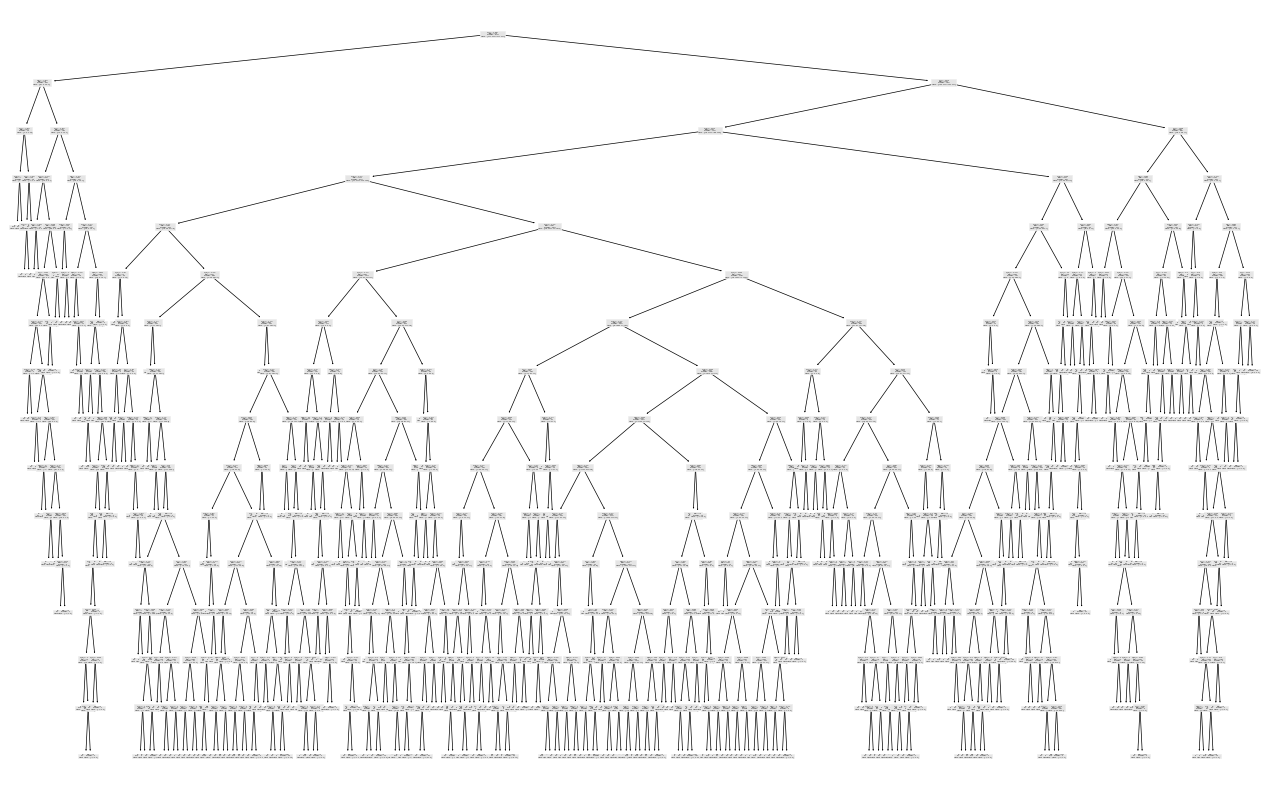

In [273]:
tree.plot_tree(clf)

#### * Predict📈

In [274]:
clf.predict(X_test)
clf.score(X_test, y_test)
clf.predict_proba(X_test)

array([[0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        ],
       [0.        , 0.        , 0.        , 1.        ],
       ...,
       [0.03      , 0.04      , 0.        , 0.93      ],
       [0.        , 0.89772727, 0.03977273, 0.0625    ],
       [0.        , 0.        , 0.        , 1.        ]])

In [279]:
y_pred = clf.predict(X_test)

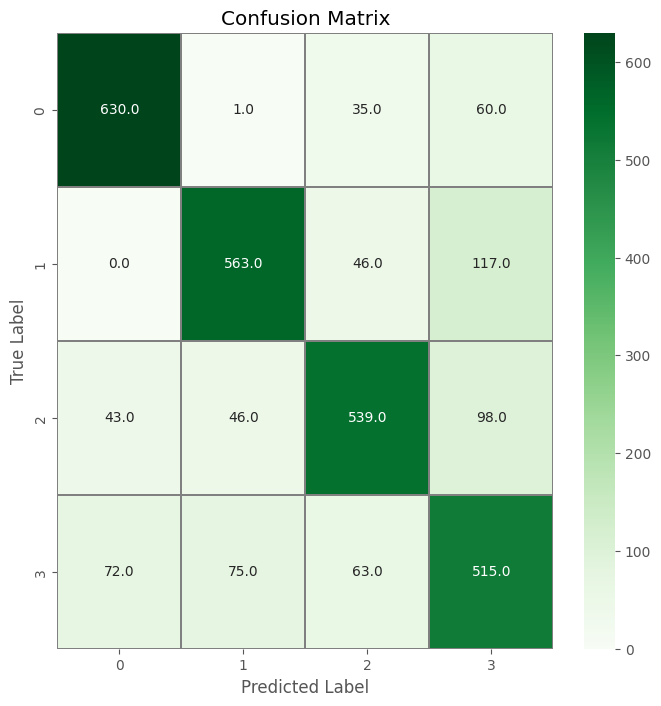

Classification report - Decision tree
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       726
           1       0.82      0.78      0.80       726
           2       0.79      0.74      0.77       726
           3       0.65      0.71      0.68       725

    accuracy                           0.77      2903
   macro avg       0.78      0.77      0.77      2903
weighted avg       0.78      0.77      0.77      2903



In [280]:
confusion_mtx = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print('Classification report - Decision tree')
print(classification_report(y_test, y_pred))

## NN Method⛓

In [219]:
from sklearn.neighbors import (NeighborhoodComponentsAnalysis,
KNeighborsClassifier)
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

nca = NeighborhoodComponentsAnalysis(random_state=42)
knn = KNeighborsClassifier(n_neighbors=4)
nca_pipe = Pipeline([('nca', nca), ('knn', knn)])
nca_pipe.fit(X_train, y_train)
print(nca_pipe.score(X_test, y_test))

0.826730967964175


In [225]:
y_pred = nca_pipe.predict(X_test)

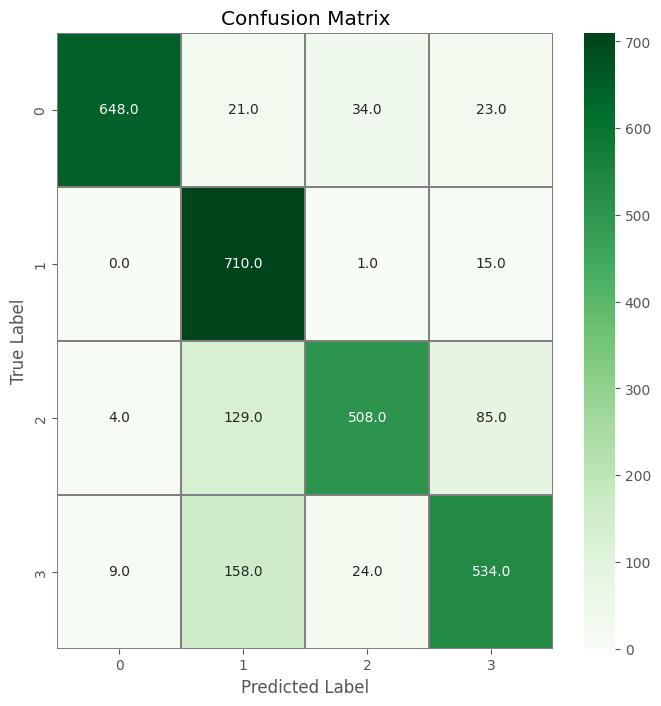

Classification report - Decision tree
              precision    recall  f1-score   support

           0       0.98      0.89      0.93       726
           1       0.70      0.98      0.81       726
           2       0.90      0.70      0.79       726
           3       0.81      0.74      0.77       725

    accuracy                           0.83      2903
   macro avg       0.85      0.83      0.83      2903
weighted avg       0.85      0.83      0.83      2903



In [228]:
confusion_mtx = confusion_matrix(y_test, y_pred)

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print('Classification report - Decision tree')
print(classification_report(y_test, y_pred))